In [1]:
import sys
sys.path.insert(0, '/Users/kedzie/Documents/Berkeley/notebooks/utilities')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections.abc import Iterable

from utility_functions.utils import * #read_data, read_press, getnearpos, folder_files, headspace
from matplotlib import rcParams as rc
rc['mathtext.default'] = 'regular'

def oerorr(oer, orr):
    return(oer/orr)

total moles of gas consumed: 35.62421206342779
total moles of gas evolved: 33.56922371513107
charge cap= 0.9418828702635235
oer/orr: 0.9428973552541317
final current= 0.0050206496000000005
total moles of gas consumed: 29.034589777580948
total moles of gas evolved: 28.18867861479437
charge cap= 0.7797038099832005
oer/orr: 0.9704106740966532
final current= 0.0050371946
total moles of gas consumed: 25.199286320033735
total moles of gas evolved: 24.45427587456335
charge cap= 0.6783066151870621
oer/orr: 0.970687701474058
final current= 0.0050219222999999995


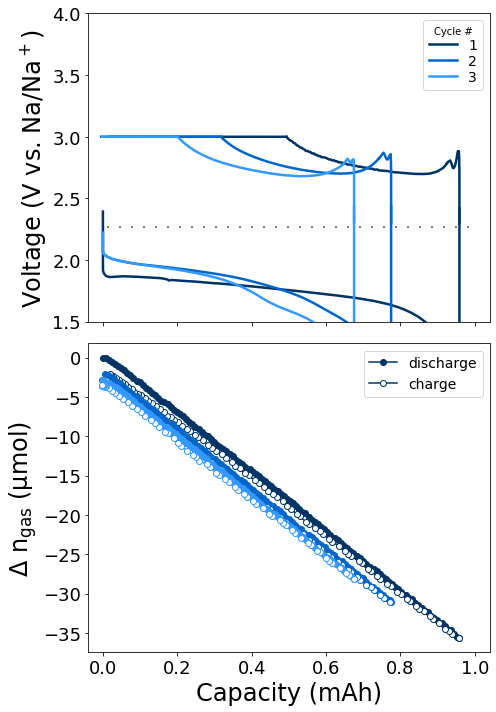

In [2]:
def plot_CA_cycles(discharge, cp1, cp2, ca, press, ch, cyclenum=1, leg=None, offset=0):
    
    n=1
    i_dis = -1*np.mean( discharge['I/mA'] ) #calculate discharge and charge current (mA)
    i_ch = np.mean(cp1['I/mA'])
    cp2['Capacity/mA.h'] = cp2['Capacity/mA.h'] + cp1['Capacity/mA.h'].iloc[-1]
    ca['Capacity/mA.h'] = ca['Capacity/mA.h'] + cp2['Capacity/mA.h'].iloc[-1]   
    umoles = press['pressure/torr']/760*headspace(ch)/(press['temperature/C']+273)/0.082057
    umoles = umoles-umoles.iloc[0]
    col = ['#003366', '#0066CC', '#3399FF', '#99CCFF']
    
    cap = []
    curr = []
    files_ec = pd.concat([discharge, cp1, cp2, ca], sort=True) 
    
    for i in range(len(umoles)):
        dex = getnearpos( files_ec['time/s'], press['time/s'].iloc[i] )
        cap.append( files_ec['Capacity/mA.h'].iloc[dex] )
        curr.append( files_ec['I/mA'].iloc[dex] )

    umolesdf = pd.DataFrame( press['time/s'], columns=['time/s'] )
    umolesdf['umoles'] = umoles
    umolesdf['Capacity/mA.h'] = cap
    umolesdf['I/mA'] = curr
    
    st1= discharge['time/s'].iloc[0]
    end1= discharge['time/s'].iloc[-1]
    st2=cp1['time/s'].iloc[0]
    end2=cp1['time/s'].iloc[-1]
    st3=cp2['time/s'].iloc[0]
    end3=cp2['time/s'].iloc[-1]
    st4=ca['time/s'].iloc[0]
    end4=ca['time/s'].iloc[-1]
    end_cap = [discharge['Capacity/mA.h'].iloc[-1], cp1['Capacity/mA.h'].iloc[-1], cp2['Capacity/mA.h'].iloc[-1], ca['Capacity/mA.h'].iloc[-1]]

    ax.plot((discharge['Capacity/mA.h']), discharge['Ewe/V'], c=col[cyclenum-1], linestyle='-', linewidth=2.5, label = cyclenum )
    ax.plot([end_cap[0], end_cap[0]-cp1['Capacity/mA.h'].iloc[5] ], [discharge['Ewe/V'].iloc[-1], cp1['Ewe/V'].iloc[5] ], c=col[cyclenum-1], linestyle='-', linewidth=2.5, label='')
    ax.plot(end_cap[0]-cp1['Capacity/mA.h'], cp1['Ewe/V'], color=col[cyclenum-1], label='', linewidth=2.5)
    ax.plot(end_cap[0]-cp2['Capacity/mA.h'], cp2['Ewe/V'], color=col[cyclenum-1] , label='', linewidth=2.5)
    ax.plot(end_cap[0]- ca['Capacity/mA.h'], ca['Ewe/V'], color= col[cyclenum-1], linewidth=2.5, label='') 
    ax.plot([0.01, 1.0],[2.27,2.27], c='grey', linestyle=(0,(1,5)), linewidth=2, label='')
    

    st_p1 = getnearpos(press['time/s'],st1) #find time at beginning of discharge
    end_p1 = getnearpos(press['time/s'],end1) #find time at end of discharge
    
    st_p2 = getnearpos(press['time/s'],st2)
    end_p2 = getnearpos(press['time/s'],end2)
    
    st_p3 = getnearpos(press['time/s'],st3)
    end_p3 = getnearpos(press['time/s'],end3)
    
    st_p4 = getnearpos(press['time/s'],st4)
    end_p4 = getnearpos(press['time/s'],end4)
    umolesdf['umoles'] = umolesdf['umoles']-umolesdf['umoles'].iloc[st_p1]
    
    x=[0, end_cap[0]]
    y=[0+offset,-end_cap[0]*3.6/n/96485*10**6+offset]
    
    print('total moles of gas consumed: ' + str(-umoles.iloc[end_p1]+umoles.iloc[st_p1]))
    print('total moles of gas evolved: ' + str(umoles.iloc[end_p4-5]-umoles.iloc[st_p2]))
    oerorr=(umoles.iloc[end_p4]-umoles.iloc[st_p2])/(-umoles.iloc[end_p1]+umoles.iloc[st_p1])
    
    print('charge cap= ' + str( ca['Capacity/mA.h'].iloc[-1] ) )
    print('oer/orr: '+ str(oerorr))
    print('final current= ' + str(ca['I/mA'].iloc[-1]))
    pressure_gap=umoles.iloc[end_p1]-umoles.iloc[st_p2]
    
    ax2.plot(umolesdf['Capacity/mA.h'][st_p1:end_p1+1], umolesdf['umoles'][st_p1:end_p1+1]+offset,  'o-', color= col[cyclenum-1], linewidth=1.5, markersize=6, label='')#, markevery=(0.0,0.02))
    ax2.plot(end_cap[0]-umolesdf['Capacity/mA.h'][st_p2:end_p4-1], (umolesdf['umoles'])[st_p2:end_p4-1]+pressure_gap+offset,  'o-', color=col[cyclenum-1], linewidth=1.5, markersize=6, mfc='white', markevery=(0.0,0.012), label='')
    #ax2.plot(x,y, 'k-',  c='#606060', linestyle='--', label= '',linewidth= 1)
    
    ax.set_ylabel('Voltage (V vs. Na/Na$^+$)', fontsize=24)
    ax2.set_ylabel('$\Delta$ n$_{gas}$ ($\mu$mol)', fontsize=24)
    ax2.set_xlabel('Capacity (mAh)', fontsize=24)
    ax.tick_params(axis='both', which='major', labelsize=18)
    ax2.tick_params(axis='both', which='major', labelsize=18)
    ax.set_ylim([1.5,4])
    ax.set_xlim([-0.04,1.04])
    plt.tight_layout()
    return ( umolesdf['umoles'][end_p4-1]+pressure_gap )

mc2_cycles = folder_files('/Users/kedzie/Documents/Berkeley/Research/Data/2019/191015_MCMB523_cycling_cell2/')
mc2_1= read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2019/191015_MCMB523_cycling_cell2/191015_MCMB523_cycling_cell2_cy1_Ch2__2019-10-15_12.47_45.txt')
mc2_2= read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2019/191015_MCMB523_cycling_cell2/191015_MCMB523_cycling_cell2_cy2_Ch2__2019-10-16_11.41_02.txt')
mc2_3= read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2019/191015_MCMB523_cycling_cell2/191015_MCMB523_cycling_cell2_cy3_Ch2__2019-10-17_09.47_00.txt')
mc2_4= read_press ('/Users/kedzie/Documents/Berkeley/Research/Data/2019/191015_MCMB523_cycling_cell2/191015_MCMB523_cycling_cell2_cy4_Ch2__2019-10-17_16.07_50.txt')

colors = ['#001933','#003366', '#0066CC', '#3399FF', '#99CCFF']
fig, (ax, ax2)= plt.subplots(2, sharex=True, figsize= (7,10)) 

o1=plot_CA_cycles(mc2_cycles[1], mc2_cycles[3], mc2_cycles[4], mc2_cycles[5], mc2_1, 2, 1,'#003366' )
o2=plot_CA_cycles(mc2_cycles[8], mc2_cycles[10], mc2_cycles[11], mc2_cycles[12], mc2_2, 2, 2, '#0066CC', offset=o1)
o3= plot_CA_cycles(mc2_cycles[15], mc2_cycles[17], mc2_cycles[18], mc2_cycles[19], mc2_3, 2, 3, '#3399FF',offset=o1+o2)
#plot_CA_cycles(mc2_cycles[22], mc2_cycles[24], mc2_cycles[25], mc2_cycles[26], mc2_4, 2, 4, '#99CCFF',offset=o1+o2+o3)


ax.legend(title="Cycle #", fontsize=14, loc='upper right', labelspacing=0.15)
ax2.legend(labels=['discharge', 'charge'], fontsize=14)






total moles of gas consumed: 36.70377307642261
total moles of gas evolved: 35.448511924377996
charge cap= 0.9583329285184543
oer/orr: 0.9657191263921288
final current= 0.0050726634999999996
total moles of gas consumed: 38.06858493666728
total moles of gas evolved: 36.69385862242828
charge cap= 1.0057641027702227
oer/orr: 0.9623630584278648
final current= 0.0050325952
total moles of gas consumed: 38.12657017283823
total moles of gas evolved: 36.674201425807325
charge cap= 1.0062405156592529
oer/orr: 0.9608934447598677
final current= 0.0050523113


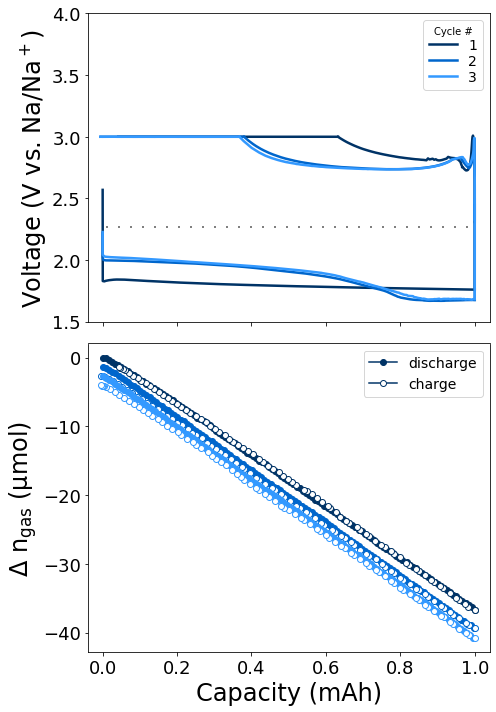

In [4]:
#New batch of 10% binder cathodes - cell cycling on delilah

mc2_cycles = folder_files('/Users/kedzie/Documents/Berkeley/Research/Data/2020/200224_Na_10%binder_MCMB0203_cycling_CA_cell1/')
mc2_1= read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2020/200224_Na_10%binder_MCMB0203_cycling_CA_cell1/200224_Na_10%binder_MCMB0203_CA_cell1_cycle1_Ch1__2020-02-24_12.22_00.txt')
mc2_2= read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2020/200224_Na_10%binder_MCMB0203_cycling_CA_cell1/200224_Na_10%binder_MCMB0203_CA_cell1_cycle2_Ch1__2020-02-24_23.17_55.txt')
mc2_3= read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2020/200224_Na_10%binder_MCMB0203_cycling_CA_cell1/200224_Na_10%binder_MCMB0203_CA_cell1_cycle3_Ch1__2020-02-25_07.42_14.txt')
mc2_4= read_press ('/Users/kedzie/Documents/Berkeley/Research/Data/2020/200224_Na_10%binder_MCMB0203_cycling_CA_cell1/200224_Na_10%binder_MCMB0203_CA_cell1_cycle4_Ch1__2020-02-25_16.04_05.txt')

colors = ['#001933','#003366', '#0066CC', '#3399FF', '#99CCFF']
fig, (ax, ax2)= plt.subplots(2, sharex=True, figsize= (7,10)) 

o1=plot_CA_cycles(mc2_cycles[1], mc2_cycles[3], mc2_cycles[4], mc2_cycles[5], mc2_1, 2, 1,'#003366' )
o2=plot_CA_cycles(mc2_cycles[8], mc2_cycles[10], mc2_cycles[11], mc2_cycles[12], mc2_2, 2, 2, '#0066CC', offset=o1)
o3= plot_CA_cycles(mc2_cycles[15], mc2_cycles[17], mc2_cycles[18], mc2_cycles[19], mc2_3, 2, 3, '#3399FF',offset=o1+o2)
#plot_CA_cycles(mc2_cycles[22], mc2_cycles[24], mc2_cycles[25], mc2_cycles[26], mc2_4, 2, 4, '#99CCFF',offset=o1+o2+o3)


ax.legend(title="Cycle #", fontsize=14, loc='upper right', labelspacing=0.15)
ax2.legend(labels=['discharge', 'charge'], fontsize=14)
#plt.savefig('/Users/kedzie/Documents/Berkeley/Research/Data/2020/200224_Na_10%binder_MCMB0203_cycling_CA_cell1/Cycling graphite CA cell1.png', transparent= True, dpi=600, bbox_inches='tight')



total moles of gas consumed: 38.34921791148001
total moles of gas evolved: 34.710670778752444
charge cap= 0.9616360420154202
oer/orr: 0.9049059745343073
final current= 0.0050289221
total moles of gas consumed: 37.7404850871861
total moles of gas evolved: 36.38926554885002
charge cap= 0.9992707706987858
oer/orr: 0.966042185316748
final current= 0.0050696479


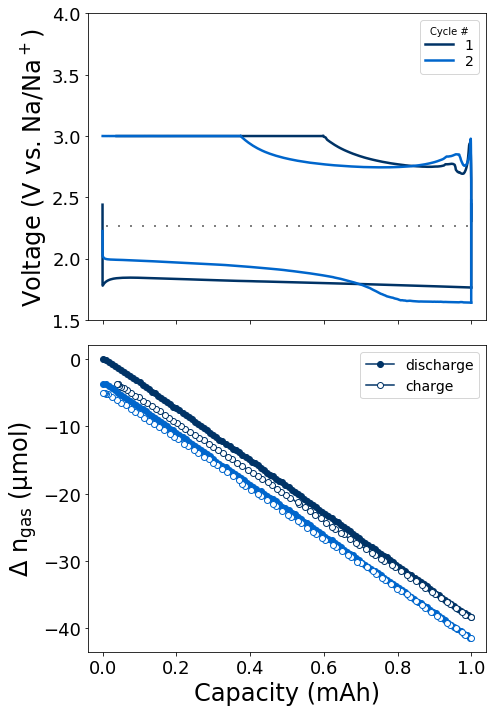

In [24]:
cell2_cycles = folder_files('/Users/kedzie/Documents/Berkeley/Research/Data/2020/200224_Na_10%binder_MCMB0203_cycling_CA_cell2/')
cell2_1= read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2020/200224_Na_10%binder_MCMB0203_cycling_CA_cell2/200224_Na_10%binder_MCMB0203_CA_cell2_cycle1_Ch2__2020-02-24_12.42_04.txt')
cell2_2= read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2020/200224_Na_10%binder_MCMB0203_cycling_CA_cell2/200224_Na_10%binder_MCMB0203_CA_cell2_cycle2_Ch2__2020-02-24_23.18_03.txt')
cell2_3= read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2020/200224_Na_10%binder_MCMB0203_cycling_CA_cell2/200224_Na_10%binder_MCMB0203_CA_cell2_cycle2_Ch2__2020-02-25_07.42_34.txt')

colors = ['#001933','#003366', '#0066CC', '#3399FF', '#99CCFF']
fig, (ax, ax2)= plt.subplots(2, sharex=True, figsize= (7,10)) 

o1=plot_CA_cycles(cell2_cycles[1], cell2_cycles[3], cell2_cycles[4], cell2_cycles[5], cell2_1, 2, 1,'#003366' )
o2=plot_CA_cycles(cell2_cycles[8], cell2_cycles[10], cell2_cycles[11], cell2_cycles[12], cell2_2, 2, 2, '#0066CC', offset=o1)
#o3= plot_CA_cycles(cell2_cycles[15], cell2_cycles[17], cell2_cycles[18], cell2_cycles[19], cell2_3, 2, 3, '#3399FF',offset=o1+o2)

ax.legend(title="Cycle #", fontsize=14, loc='upper right', labelspacing=0.15)
ax2.legend(labels=['discharge', 'charge'], fontsize=14)

#plt.savefig('/Users/kedzie/Documents/Berkeley/Research/Data/2020/200224_Na_10%binder_MCMB0203_cycling_CA_cell2/Cycling graphite CA cell2 - 2cycles.png', transparent= True, dpi=600, bbox_inches='tight')




o2 consumed: 36.72969834945491
o2 evolved: 35.27416393790824
0.9603717297730471
o2 consumed: 23.755748208870784
o2 evolved: 25.517882709638243
1.0741771837819636
o2 consumed: 7.419856507038105
o2 evolved: 6.41027149920707
0.863934699158482


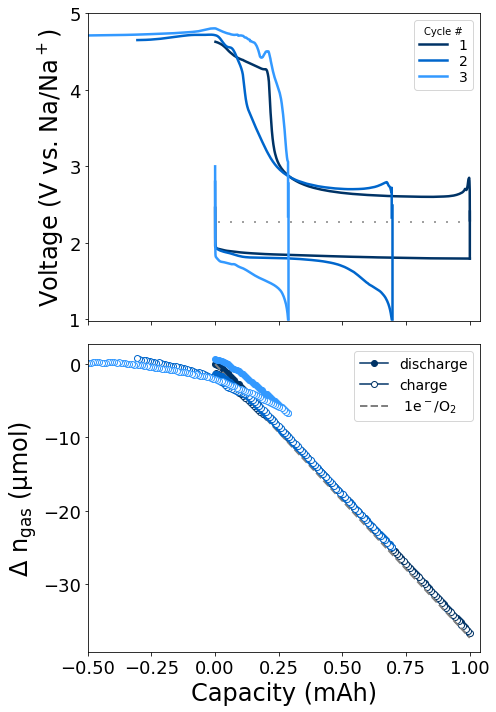

In [66]:
def plot_cycling(disch, chrg, press, channel, cyclenum, n=None, offset=0, eline=False):
    i=cyclenum
    colors=['#001933','#003366', '#0066CC', '#3399FF', '#99CCFF']
    n=1
    disc_i= np.mean(disch['I/mA']) #/(np.pi*0.6**2)
    chrg_i= np.mean(chrg['I/mA']) #/(np.pi*0.6**2)
    
    #find the final capacity reached on discharge in mAh
    cap=disch['Capacity/mA.h'].iloc[-1]

    x1=disch['Capacity/mA.h'] #/(np.pi*0.6**2)
    y1=disch['Ewe/V']
    x2=(cap-chrg['Capacity/mA.h']) #/(np.pi*0.6**2)
    y2=chrg['Ewe/V']
    
    endindex=-1
    if (i==4):
        endindex=202
    else:
        endindex=-1        
    ax.plot(x1, y1, c=colors[i], linestyle='-', linewidth=2.5, label = str(i))
    ax.plot([x1.iloc[-1], x2.iloc[5] ], [ y1.iloc[-1], y2.iloc[5] ], c=colors[i], linestyle='-', linewidth=2.5, label='')
    ax.plot(x2[:endindex], y2[:endindex], c=colors[i], linestyle='-', label='', linewidth=2.5)
    ax.plot([0.01,cap],[2.27,2.27], c='#A0A0A0', linestyle=(0,(1,5)), linewidth=2)
    
    st1=disch['time/s'].iloc[0]
    end1=disch['time/s'].iloc[-1]
    
    st2=chrg['time/s'].iloc[0]
    end2=chrg['time/s'].iloc[-1]
    
    #determine start and end indices in pressure df for discharge and charge
    st_p1 = getnearpos(press['time/s'],st1)
    end_p1 = getnearpos(press['time/s'],end1)
    
    st_p2 = getnearpos(press['time/s'],st2)
    end_p2 = getnearpos(press['time/s'],end2)
    
    temp = press['temperature/C']+273
    umoles = press['pressure/torr']/760*headspace(channel)/temp/0.082057
    umoles = umoles-umoles.iloc[st_p1]
    elec_oxy= x1.iloc[-1]*3.6/96485/umoles[end_p1]
    
    disch_cap=(press['time/s']-press['time/s'].iloc[st_p1])*-disc_i/3600
    char_cap=cap-(press['time/s']-press['time/s'].iloc[st_p2])*chrg_i/3600 #divide cap by/(np.pi*.6**2)

    gap= umoles[end_p1]-umoles[st_p2]

    x=[0,cap] #/(np.pi*0.6**2)]
    y=[0-offset,-cap*3.6/n/96485*10**6-offset]
    
    ax2.plot(disch_cap[st_p1:end_p1+1], (umoles)[st_p1:end_p1+1]+offset, 'o-', color= colors[i], linewidth=1.5, markersize=6, label='')
    ax2.plot(char_cap[st_p2:(end_p2+1)], (umoles)[st_p2:(end_p2+1)]+gap+offset, 'o-', color=colors[i], linewidth=1.5, markersize=6, mfc='white', label='')
    if eline==True:
        ax2.plot(x, y,  c='grey', linestyle='--', label= '',linewidth= 2)

    print("o2 consumed: "+ str(umoles[st_p1]-(umoles[end_p1+1] )))
    print("o2 evolved: "+ str(umoles[end_p2]-(umoles[st_p2+1] )))
    print((umoles[end_p2]-(umoles[st_p2+1]))/(umoles[st_p1]-(umoles[end_p1+1])))

    ax.tick_params(axis='both', which='major', labelsize=18); ax2.tick_params(axis='both', which='major', labelsize=18)
    ax.set_ylabel('Voltage (V vs. Na/Na$^+$)', fontsize=24); ax2.set_xlabel('Capacity (mAh)', fontsize=24)
    ax2.set_ylabel('$\Delta$ n$_{gas}$ ($\mu$mol)', fontsize=24); plt.tight_layout()
    ax.set_ylim([0.98,5])
    ax.set_xlim([-0.5,1.04])
    return ( umoles[end_p2-1]+gap )

# cp1_ec = folder_files('/Users/kedzie/Documents/Berkeley/Research/Data/2020/200226_Na_10%binder_MCMB0203_cycling_CP_cell1/')
# cp1 = read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2020/200226_Na_10%binder_MCMB0203_cycling_CP_cell1/200226_Na_10%binder_MCMB0203_CP_cell1_cycle1_Ch1__2020-02-26_13.08_19.txt')
# cp2 = read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2020/200226_Na_10%binder_MCMB0203_cycling_CP_cell1/200226_Na_10%binder_MCMB0203_CP_cell1_cycle2_Ch1__2020-02-26_23.55_19.txt')
# cp3 = read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2020/200226_Na_10%binder_MCMB0203_cycling_CP_cell1/200226_Na_10%binder_MCMB0203_CP_cell1_cycle3_Ch1__2020-02-27_18.24_27.txt')

# fig, (ax, ax2)= plt.subplots(2, sharex=True, figsize= (7,10)) 
# o1=plot_cycling(cp1_ec[1],cp1_ec[3], cp1, 3, 1, eline=True)
# o2=plot_cycling(cp1_ec[6],cp1_ec[8], cp2, 3, 2, offset=o1)
# o3=plot_cycling(cp1_ec[11],cp1_ec[13], cp3, 3, 3, offset=o1+o2)
# ax.legend(title = "Cycle #", fontsize=14, labelspacing=0.15)
# ax2.legend(labels=['discharge', 'charge', ' 1e$^-$/O$_2$' ], fontsize=14)

cp1_ec_cell1 = folder_files('/Users/kedzie/Documents/Berkeley/Research/Data/2020/200226_Na_10%binder_MCMB0203_cycling_CP_cell1/')
cp1_1 = read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2020/200226_Na_10%binder_MCMB0203_cycling_CP_cell1/200226_Na_10%binder_MCMB0203_CP_cell1_cycle1_Ch1__2020-02-26_13.08_19.txt')
cp2_1 = read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2020/200226_Na_10%binder_MCMB0203_cycling_CP_cell1/200226_Na_10%binder_MCMB0203_CP_cell1_cycle2_Ch1__2020-02-26_23.55_19.txt')
cp3_1 = read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2020/200226_Na_10%binder_MCMB0203_cycling_CP_cell1/200226_Na_10%binder_MCMB0203_CP_cell1_cycle3_Ch1__2020-02-27_18.24_27.txt')

fig, (ax, ax2)= plt.subplots(2, sharex=True, figsize= (7,10)) 
o1=plot_cycling(cp1_ec_cell1[1],cp1_ec_cell1[3], cp1_1, 3, 1, eline=True)
o2=plot_cycling(cp1_ec_cell1[6],cp1_ec_cell1[8], cp2_1, 3, 2, offset=o1)
o3=plot_cycling(cp1_ec_cell1[11],cp1_ec_cell1[13], cp3_1, 3, 3, offset=o1+o2)
ax.legend(title = "Cycle #", fontsize=14, labelspacing=0.15)
ax2.legend(labels=['discharge', 'charge', ' 1e$^-$/O$_2$' ], fontsize=14)
#plt.savefig('/Users/kedzie/Documents/Berkeley/Research/Data/2020/200226_Na_10%binder_MCMB0203_cycling_CP_cell1/Cycling graphite CP cell1 - 3cycles.png', transparent= True, dpi=600, bbox_inches='tight')


o2 consumed: 36.85931754438562
o2 evolved: 35.398646548355686
0.9603717297730484
o2 consumed: 25.9393769775525
o2 evolved: 18.86738194378458
0.727364499159409


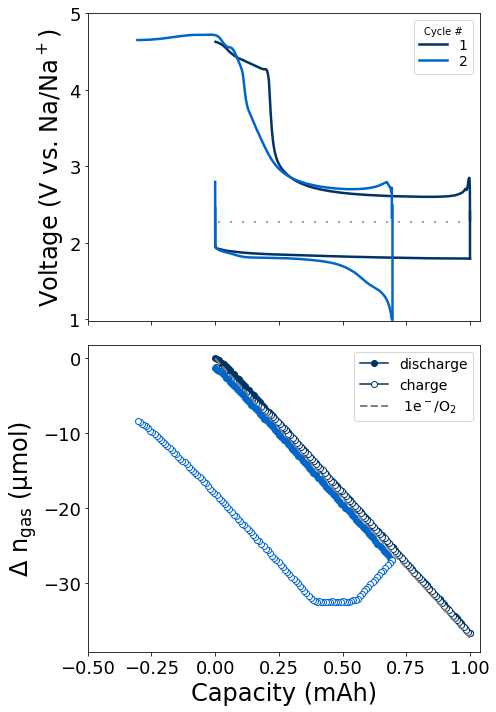

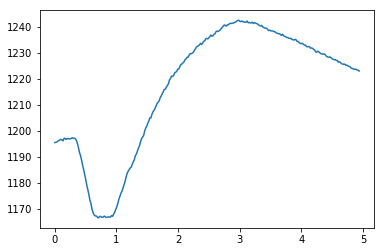

In [65]:
cp1_ec_cell2 = folder_files('/Users/kedzie/Documents/Berkeley/Research/Data/2020/200226_Na_10%binder_MCMB0203_cycling_CP_cell1/')
cp1_2 = read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2020/200226_Na_10%binder_MCMB0203_cycling_CP_cell2/200226_Na_10%binder_MCMB0203_CP_cell2_cycle1_Ch2__2020-02-26_13.15_54.txt')
cp2_2 = read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2020/200226_Na_10%binder_MCMB0203_cycling_CP_cell2/200226_Na_10%binder_MCMB0203_CP_cell2_cycle2_Ch2__2020-02-26_23.55_10.txt')

fig, (ax, ax2)= plt.subplots(2, sharex=True, figsize= (7,10)) 
o1=plot_cycling(cp1_ec_cell2[1],cp1_ec_cell2[3], cp1_1, 2, 1, eline=True)
o2=plot_cycling(cp1_ec_cell2[6],cp1_ec_cell2[8], cp1_2, 2, 2, offset=o1)
ax.legend(title = "Cycle #", fontsize=14, labelspacing=0.15)
ax2.legend(labels=['discharge', 'charge', ' 1e$^-$/O$_2$' ], fontsize=14)
#plt.savefig('/Users/kedzie/Documents/Berkeley/Research/Data/2020/200226_Na_10%binder_MCMB0203_cycling_CP_cell2/Cycling graphite CP cell 2 -bad.png', transparent= True, dpi=600, bbox_inches='tight')


plt.figure()
plt.plot(cp2_2['time/s']/3600, cp2_2['pressure/torr'])
#plt.savefig('/Users/kedzie/Documents/Berkeley/Research/Data/2020/200226_Na_10%binder_MCMB0203_cycling_CP_cell2/Cycling graphite CP cell 2 -bad.png', transparent= True, dpi=600, bbox_inches='tight')

